# Keras Tutorial

Apple의 Core ML 및 Vison Framework로 간단하게 Machine Learning을 구현할 수 있다.    
Turi Create를 사용해 미리 훈련된 모델 중 하나를 가져와 transfer learning을 할 수도 있다.    
하지만, 개별적인 커스터마이징이 필요하다면 TensorFlow, Keras, PyTorch 등의 Framework를 사용해야 한다.  

## Why Use Keras?
- scikit-learn으로 linear regression나 support vector machine 등의 ML 알고리즘을 쉽게 실행할 수 있다.
- PyTorch, TensorFlow 등으로 Deep learning model을 더 세세하게 제어할 수 있다.
- 다른 Deep learning framework인 CNTK(Microsoft), Caffe(Berkeley)는 C++ 에 액세스할 수 있는 Python API이다.
    
Keras는 TensorFlow와 CNTK의 wrapper이면서 Amazon의 MXNet 이 곧 추가될 예정이다.    
backend에서 쉽게 training할 수 있고 배포고 쉽다.    
TensorFlow를 직접 사용하는 것보다 Keras를 사용하는 다른 이유는 coremltools이 Keras converter를 포함하고 있기 때문이다.    
TensorFlow to CoreML converter와 MXNet to CoreML converter가 있지만, TensorFlow converter는 coremltools에 없다.    
Keras는 CNTK를 backend로 지원하지만, coremltools는 Keras + TensorFlow에서만 작동한다.    
coremltools은 Python 2와 Python 3를 모두 지원하지만, Python 2.7에서 가장 최적화되어 있다.    

## Setting Up Docker
Docker는 가상 머신과 같이 customized environment을 배포할 수 있는 container platform이다.    
배포되어 있는 Docker image로 수 많은 ML 리소스에 액세스할 수 있다.    
Docker를 실행한 후, 해당 폴더에서    

docker build -t keras-mnist .    
docker run --rm -it -p 8888:8888 -v $(pwd)/notebook:/workspace/notebook keras-mnist 
    
Docker 컨테이너의 notebook 폴더를 로컬 notebook 폴더에 매핑하므로 Docker 서버를 로그 아웃 한 후에도 파일에 액세스할 수 있다.     
토큰을 포함하는 URL을 출력하는데 해당 URL을 브라우저에 붙여 넣으면 된다(Docker 서버의 notebook을 연다).    

### ML in a Nutshell
Arthur Samuel은 기계 학습을 "컴퓨터에 명시 적으로 프로그래밍하지 않고 학습 할 수있는 능력을 부여하는 연구 분야"라고 정의했다.    
충분한 데이터가 있는 경우 모델을 훈련시켜 패턴을 인식한 다음 새로운 데이터에 적용할 수 있다.    
모든 training 데이터에 대한 올바른 결과(정답)를 알고 있는 것을 supervised learning이라 한다.    
지도 학습에서 모델은 예측을 정답과 비교해 오차를 줄이고 정확도를 높이기 위해 스스로 조절한다.    

### Weights & Threshold
결정을 위한 각 요인에 다른 가중치를 지정한다. 가 요인의 값에 각 요인의 가중치를 곱한 다음 가중치 합(weighted sum)을 얻기 위해 이를 더한다.    
가장 높은 결과를 얻는 결과가 최선의 선택이 된다. 모델을 사용하는 다른 방법은 binary output(Yes/No)를 출력하는 것이다.    
임계값을 정하고, 가중치 합이 임계 값 아래로 떨어지는 선택을 목록에서 제거한다.    

### Training an ML Model
가중치를 구하는 것은 쉬운 일이 아니지만, 많은 데이터에서 ML 모델을 훈련하면서 조절해 나갈 수 있다.    
ML 모델을 학습하려면 임의의 가중치로 시작하여 training data에 적용한 다음 출력을 정답과 비교해 오류를 계산한다.    
이(오류)는 최소값을 갖는 다차원 함수이고 훈련의 목표는 이 최소값에 매우 가깝게 도달하는 가중치를 구하는 것이다.    
overfitting이 일어나지 않도록 염두 해야 한다.

### Stochastic Gradient Descent
오류 함수의 기울기를 계산한 다음 가중치를 조정해 기울기를 줄인다. 이를 gradient descent라 하며, 적절한 가중치를 찾는데 사용된다.    
SGD(Stochastic gradient descent)는 무작위로 선택된 training data의 mini-batch에서 기울기를 추정한다.    

### Optimizers
현재 가장 많이 사용하는 최적화 함수는 Adam(Adaptive Moment estimation)이다.    
이전에 많이 쓰던 RMSprop(Root Mean Square propagation)와 AdaGrad(Adaptive Gradient algorithm)를 결합한 모델이다.    

## Import Utilities & Dependencies

- `print_function` works in Python 2 and Python 3
- Keras uses the NumPy mathematics library to manipulate arrays and matrices. Matplotlib is a plotting library for NumPy: you'll use it to inspect a training data item.
- Import Keras 2.0.6 and the components needed for the model. [FutureWarning due to NumPy 1.14](https://github.com/h5py/h5py/issues/961)
- Import coremltools

In [1]:
from __future__ import print_function 
# __future__ 는 Python2 와 Python3 의 호환성 레이어 이다. 
#Python2 에서는 print 를 쓰지만, Python3 에서는 print()를 사용한다. print_function를 import해 가져오면, Python2 에서 print()를 쓸 수 있다.
from matplotlib import pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import coremltools #Core ML 로 모델을 검사, 작성, 테스트 할 수 있는 Python 패키지
# coremltools supports Keras version 2.0.6
print('keras version ', keras.__version__)

Using TensorFlow backend.


keras version  2.0.6


## Load and Pre-Process Data

### Training and Testing/Validation Sets

`mnist.load_data()` downloads from https://s3.amazonaws.com/img-datasets/mnist.npz — this takes a little while.

In [2]:
# First, get your data!
(x_train, y_train), (x_val, y_val) = mnist.load_data()
#데이터를 다운로드 하고, 항목을 셔플한 후, training 데이터와 validation 데이터로 분리한다.
#validation 으로 모델이 overfitting 되었는지 여부를 감지하는 데 도움이 된다.
#training을 하면서, 수정된 매개 변수를 사용해 validation data의 출력을 계산한다.
#그 결과로 손실 및 정확도를 비교해 가장 나은 모델을 저장하고, 많은 반복(epoch)에도 손실 및 정확도가 향상되지 않으면 초기에 중지하는 콜백을 설정한다.

11403264/11490434 [============================>.] - ETA: 0s

### Inspect x and y Data

x_train shape:  (60000, 28, 28)
60000 training samples
x_val shape:  (10000, 28, 28)
10000 validation samples
First x sample
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

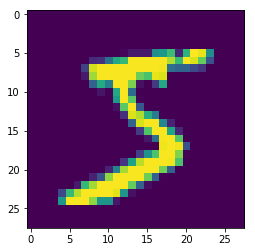

y_train shape:  (60000,)
First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]


In [3]:
# Inspect x data
print('x_train shape: ', x_train.shape) #28 x 28 픽셀의 training data 60000 개
# Displays (60000, 28, 28)
print(x_train.shape[0], 'training samples')
# Displays 60000 train samples
print('x_val shape: ', x_val.shape) #28 x 28 픽셀의 validation data 10000 개
# Displays (10000, 28, 28)
print(x_val.shape[0], 'validation samples')
# Displays 10000 validation samples

print('First x sample\n', x_train[0])
# Displays an array of 28 arrays, each containing 28 gray-scale values between 0 and 255
# Plot first x sample
#각 요소가 28개인 배열 28개로 이루어져 있으며, 각 요소는 0에서 255까지의 gray-scale 값을 가지고 있다.
plt.imshow(x_train[0])
plt.show()
#plt로 배열을 이미지로 출력한다.

# Inspect y data
print('y_train shape: ', y_train.shape) #y 는 정답의 레이블을 가지고 있는 배열이다.
# Displays (60000,)
print('First 10 y_train elements:', y_train[:10])
# Displays [5 0 4 1 9 2 1 3 1 4]

### Set input and output dimensions

MNIST data items are 28 x 28-pixel images, and you want to classify each as a digit between 0 and 9.

`x_train.shape` is an array of 3 elements: number of data samples, number of rows of each data sample, number of columns of each data sample

In [4]:
img_rows, img_cols = x_train.shape[1], x_train.shape[2] # 각 이미지 배열의 행(28), 각 이미지 배열의 열(28)
num_classes = 10 #분류하고자 하는 클래스의 수
#MNIST data는 28 x 28 이미지 이며, 각 0 ~ 9 사이의 숫자를 나타낸다.

### Reshape x Data & Set Input Shape

- Insert the channels, either before or after the image's rows and columns. MNIST data samples are gray-scale, so the number of channels is 1.
- Set the input shape of the sample data, with the channels at the correct end.

In [5]:
# Set input_shape for channels_first or channels_last
if K.image_data_format() == 'channels_first': #위에서 선언할 때 K는 keras의 backend로 선언했다.
    #channels-first format (channels, rows, columns)
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    #reshpe 전 x_train.shape은 (60000, 28, 28) 였다.
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    #reshpe 전 x_val.shape은 (10000, 28, 28) 였다.
    input_shape = (1, img_rows, img_cols)
else: #channels-last format(rows, columns, channels)
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    #reshpe 전 x_train.shape은 (60000, 28, 28) 였다.
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    #reshpe 전 x_val.shape은 (10000, 28, 28) 였다.
    input_shape = (img_rows, img_cols, 1)
    
#TensorFlow, CNTK와 같은 Keras 백엔드는 channels-last format(rows, columns, channels) 또는
#channels-first format (channels, rows, columns) 로 선언한다.
#reshape로 이 형식에 맞춰 채널의 올바른 위치에 삽입해 준다.
    
#Convolutional neural network 는 이미지의 width, height, depth 정보를 사용한다.
#depth는 channel이라고도 하며, 색상 정보를 포함한다. ex. Gray-scale image는 채널이 1개, RGB image는 채널이 3개

### Inspect Reshaped x Data

TensorFlow image data format is channels-last.

In [6]:
print('x_train shape:', x_train.shape)
# x_train shape: (60000, 28, 28, 1)
print('x_val shape:', x_val.shape)
# x_val shape: (10000, 28, 28, 1)
print('input_shape:', input_shape)
# input_shape: (28, 28, 1)

#제대로 reshape 됐는 지 확인 한다. channels-last format(rows, columns, channels)이 적용되었다.
#reshpe 전 x_train.shape은 (60000, 28, 28), x_val.shape은 (10000, 28, 28) 였다.

x_train shape: (60000, 28, 28, 1)
x_val shape: (10000, 28, 28, 1)
input_shape: (28, 28, 1)


### Convert Data Type And Normalize Values

MNIST image data values are of type `uint8`, in the range [0, 255], but Keras needs values of type `float32`, in the range [0, 1].

In [7]:
x_train = x_train.astype('float32') 
x_val = x_val.astype('float32')
#float32로 type을 변환한다.

x_train /= 255
x_val /= 255
#[0, 1] 사이의 값으로 맞추기 위해 255로 나눠준다.

#모델은 매개변수 타입을 맞춰주기 위해 데이터의 type을 변경해 줘야 한다.
#MNIST image data의 type은 uint8 이며, 범위는 [0, 255]가 된다. 그러나 Keras의 type은 float32 이며 범위는 [0, 1]이다.

### Inspect Normalized x Data

In [8]:
print('First x sample, normalized\n', x_train[0])
# An array of 28 arrays, each containing 28 arrays, each with one value between 0 and 1
#각 배열의 요소 type은 float 이며, 0과 1 사이의 값을 가진다.

First x sample, normalized
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.   

### Reformat y Data

`y_train` is a 1-dimensional array with 60000 elements, but the model needs a 60000 x 10 matrix to represent the 10 categories.

**Note:** Run this cell **once only**! Running it again will produce incorrect results.

In [9]:
print('y_train shape: ', y_train.shape) #y_train은 정답 레이블 요소가 60000개 있는 1차원 배열이다.
# (60000,)
print('First 10 y_train elements:', y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
#600000개의 요소가 있는 1차원 배열을 각 10개의 카테고리를 요소로 가지고 있는 배열 60000 개로 reformatting 한다. one-hot encoding
print('New y_train shape: ', y_train.shape)
# (60000, 10)

y_train shape:  (60000,)
First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]
New y_train shape:  (60000, 10)


### Inspect Reformatted y Data

`y_train` is now an array of 10-element arrays, each containing all zeros except at the index that the image matches.

In [10]:
print('New y_train shape: ', y_train.shape)
# (60000, 10)
print('First 10 y_train elements, reshaped:\n', y_train[:10])
# An array of 10 arrays, each with 10 elements, 
# all zeros except at index 5, 0, 4, 1, 9 etc.
#one-hot encoding으로 reformat 되어, 해당 카테고리에 해당하는 요소만 1이고, 나머지는 0이 된다.

New y_train shape:  (60000, 10)
First 10 y_train elements, reshaped:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define  model architecture

### [Malireddi's Architecture](https://sriraghu.com/2017/07/06/computer-vision-in-ios-coremlkerasmnist/)

Malireddi's Architecture은 모바일 앱에 적합한 작은 모델이다. Chollet’s Architecture보다 convolutional layer(Conv2D)를 하나 더 가지고 있지만, 훨씬 더 빠르게 실행된다.

In [11]:
model_m = Sequential() #먼저 빈 Sequential 생성 후, linear stack 레이어를 추가한다.
#첫 layer 에는 MNIST 이미지의 input shape에 대한 정보가 있어야 한다(28, 28, 1).
#다른 layer는 이전 layer의 output shape에서 input shape를 추론한다. 
#이 모델에는 Conv2D 레이어 계층이 3 개 있다.
model_m.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
#첫 매개변수 32는 이 레이어에서 탐지해 훈련하려는 filter 또는 feature의 수 이다. 이는 ouput shape의 depth이기도 하다.
#두 번째 매개변수 (5, 5)는 커널의 크기이다. convolution window의 width 와 height를 지정하는 튜플이며 가중치 합을 계산한다.
#  가중치 합은 커널의 weight와 input unit values의 dot 연산으로 계산한다.
#세 번째 매개변수 activation='relu'는 활성 함수이다. Relu는 deep neural networks에서 가장 흔히 사용되는 활성화 함수이다.
model_m.add(MaxPooling2D(pool_size=(2, 2)))
#MaxPooling는 pool_size(2 x 2, 일반적으로 정사각형) 크기의 필터에서 가장 큰 값을 선택해 매개변수의 수를 줄인다. 오버피팅을 방지한다.
#이 모델에서는 각 Conv layer 층 다음에 MaxPooling을 한다. 빈번하게 MaxPooling하기 때문에 최종 모델의 크기와 학습 시간이 크게 줄어든다.
#Conv2D와 MaxPooling2D의 매개변수는 각 레이어의 ouput shape과 학습 가능한 매개 변수 수를 결정한다.
#Output Shape = (input width – kernel width + 1, input height – kernel height + 1, number of filters)
model_m.add(Dropout(0.5))
#Dropout은 MaxPooling과 쌍을 이루는 경우가 많다. 이는 랜덤으로 input unit의 일부를 0으로 설정해 overfitting을 방지한다.
#CNN의 뉴런은 인접한 뉴런에 큰 영향을 받기 때문에 랜덤하게 값을 삭제해 네트워크가 작은 변화에 덜 민감하도록 일반화시킨다.
model_m.add(Conv2D(64, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Conv2D(128, (1, 1), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten()) 
#convolutional layer의 가중치는 fully connected Dense layer로 전달하기 전에 1차원으로 만들어야 한다.
#이전 레이어의 ouput shape는 (2, 2, 128) 이므로 Flatten()의 output은 512 개의 요소가 있는 배열ㅇ; 된다.
model_m.add(Dense(128, activation='relu'))
#convolutional layer의 각 뉴런은 이전 레이어의 몇 개의 뉴런 값만 사용한다. 하지만 fully connected layer로 만들면, 이전 레이어의 모든 값을 사용한다.
#Keras에서는 Dense로 FC 레이어를 만든다. output이 128이 된다. FC의 input shape가 많으면 훈련 시간이 매우 길어진다.
#대부분의 CNN 아키텍처는 하나 이상의 Dense 레이어를 연결 시킨 후, 마지막 ouput 레이어를 연결한다.
model_m.add(Dense(num_classes, activation='softmax'))
#마지막 output 레이어 이므로 output은 카테고리의 수인 10개가 된다. softmax 활성함수는 ouput 클래스에 대한 확률 분포를 생성한다.
#Sigmoid 함수를 generalization 해 값의 범위를 [0, 1]로 스케일한다. 따라서 각 10개 클래스에 대해 [0, 1] 값의 확률이 나오게 된다.
# Inspect model's layers, output shapes, number of trainable parameters
print(model_m.summary())
#Malireddi's Architecture은 모바일 앱에 적합한 작은 모델이다. 
#Chollet’s Architecture보다 convolutional layer(Conv2D)를 하나 더 가지고 있지만, 훨씬 더 빠르게 실행된다.
#Total params의 크기 차이가 그 이유이다. 94,602개로 Chollet의 1,199,882보다 훨씬 적다. 
#모델 크기의 차이는 정확히 4.8MB와 380KB이다.
#세 개의 Conv2D 레이어가 있으며, 각각의 레이어 다음에는 MaxPooling2D 레이어로 너비와 높이를 반으로 줄인다.
#MaxPooling을 사용해, 매개 변수의 수를 줄여 모델의 전체적인 크기와 학습 속도를 높일 수 있다.
#CNN 구현이 이미 최적화되어 있어 Conv 레이어를 추가해 학습 시간을 늘리지 않아도 정확도를 크게 떨어뜨리지 않는다.
#또, dense layer(FC)가 작으면 실행 속도가 빨라진다.

#Convolutional neural network는 input을 image로 가정하고 뉴런을 width, height, depth의 세 가지 차원으로 배열한다.
#CNN은 convolutional layers로 구성되며, 각 레이어는 훈련 이미지의 higher-level feature를 감지한다.
#ex. 첫 레이어 층은 다양한 각도의 짧은 선 또는 곡선을 감지하는 필터를 조정한다. 
#  두 번째 레이어 층은 필터를 훈련시켜 이전 레이어 층에서 감지한 선의 중요한 조합을 탐지한다. 
#  최종 레이어의 필터는 이전 레이어를 기반으로 이미지를 분류한다.
#각 convolutional layer는 input에 대해 1x1, 3x3, 5x5 등의 가중치를 가지고 있는 사각형 커널(필터)을 전달하여 가중치 합을 계산한다.
#이것이 convolution process이다. 각 뉴런은 이전 계층의 1, 9 또는 25개의 뉴런에만 연결되므로 작은 input에 너무 의존되는 경향이 있다.
#이로 인해 co-adapting이 되고, overfitting이 일어날 수 있다. 따라서 CNN은 이를 막기 위해 pooling과 dropout 레이어를 포함한다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         8320      
__________

### [Chollet's Architecture](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)

Chollet's Architecture은 범용적인 모델이다.

In [12]:
model_c = Sequential()
model_c.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
# Note: hwchong, elitedatascience use 32 for second Conv2D
model_c.add(Conv2D(64, (3, 3), activation='relu'))
model_c.add(MaxPooling2D(pool_size=(2, 2)))
#Malireddi 모델에 비해, 두 개의 Conv 레이어 층 이후에 MaxPooling한다.
#대규모 네트워크에서는 Conv layer가 복잡한 feature를 탐지할 수 있게 하기 위해 이런 식으로 구현하는 것이 좋다.
model_c.add(Dropout(0.25))
model_c.add(Flatten())
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(num_classes, activation='softmax'))
# Inspect model's layers, output shapes, number of trainable parameters
print(model_c.summary())
#Chollet's Architecture은 범용적인 모델이다. 
#Malireddi's Architecture보다 convolutional layer(Conv2D)가 하나 더 적다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

## Train the Model

### Define Callbacks List

In [13]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
#callbacks은 fit 함수의 optional argument 이다. 
#epoch은 데이터 세트의 모든 mini-batches를 완전히 실행하는 것을 의미한다.
#ModelCheckpoint은 validation loss value를 모니터링 하고, loss가 가장 낮은 모델을 저장한다.
#EarlyStopping은 training의 정확도를 모니터링 한다. 2 epoch 동안 정확도가 개선되지 않으면 training을 중지한다.

### Compile & Fit Model

- On a MacBook Pro, this step takes approximately 15 minutes. Reducing `batch_size` or increasing `epochs` will increase the run time.
- You can run this cell more than once, to improve the model's accuracy.
- To *manually* stop early, click the stop button in the toolbar.

In [14]:
#GPU 사용할 수 없으면, Malireddi의 모델로 training 하는 것을 추천한다.
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
#손실함수, 최적화 모델을 지정한다.
#loss : categorical crossentropy 는 CNN으로 계산된 확률 분포 및 레이블의 실제 분포 사이의 거리를 측정한다.
#optimizer : 확률 gradient down 알고리즘이다.
#metrics : 올바르게 분류된 이미지의 비율(accuracy)을 통계로 가져온다. 가장 일반적인 측정 항목이다.

# Hyper-parameters
batch_size = 200
#mini-batch stochastic gradient fitting에 사용하는 데이터 항목 수 이다. 작을 수로 epoch이 길어진다.
#값이 클수록 GPU 병렬 처리를 잘 활용하고 데이터 전송시간을 줄인다. 하지만 너무 크면, 메모리가 부족해 질 수 있다.
epochs = 10
#각 epoch마다 손실을 줄이고 정확도를 높여야 한다. 값이 클수록 더 정확한 모델을 만들지만, 훈련 시간이 오래 걸린다.
#또, 지나치게 많은 epoch은 overfitting을 초래한다. 

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
model_m.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs,
    callbacks=callbacks_list, validation_data=(x_val, y_val), verbose=1)
#training 시작
#callbacks으로 모든 epoch를 완료하기 전에 모델이 개선되지 않으면 콜백으로 중단할 수도 있다.
#validation data를 10000개 설정했다. 이 인수를 전달하면, 훈련하는 동안 유효성 검사를 해 유효성 검사의 자체 손실 및 정확도를 모니터링할 수 있다.
#  이 값이 학습으로 출력 된 값보다 나쁠 경우, 해당 모델이 오버피팅 된 것임을 알 수 있다.
#Verbose 의 값은 각 각 0 = silent, 1 = progress bar, 2 = one line per epoch 를 나타낸다. 훈련 시 현재 상황을 출력 해 보여준다.

#출력 결과, 각 epoch마다 loss가 감소하고 accuracy가 증가해야 한다.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 114s - loss: 0.5950 - acc: 0.8018 - val_loss: 0.1553 - val_acc: 0.9536
Epoch 2/10
60000/60000 [==============================] - 125s - loss: 0.1936 - acc: 0.9396 - val_loss: 0.0909 - val_acc: 0.9704
Epoch 3/10
60000/60000 [==============================] - 118s - loss: 0.1428 - acc: 0.9556 - val_loss: 0.0723 - val_acc: 0.9783
Epoch 4/10
60000/60000 [==============================] - 127s - loss: 0.1157 - acc: 0.9640 - val_loss: 0.0559 - val_acc: 0.9836
Epoch 5/10
60000/60000 [==============================] - 119s - loss: 0.0981 - acc: 0.9693 - val_loss: 0.0463 - val_acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 134s - loss: 0.0891 - acc: 0.9721 - val_loss: 0.0409 - val_acc: 0.9873
Epoch 7/10
60000/60000 [==============================] - 111s - loss: 0.0806 - acc: 0.9747 - val_loss: 0.0373 - val_acc: 0.9885
Epoch 8/10
60000/60000 [=======================

## Convert to Core ML Model

In [15]:
#가장 낮은 val_loss 값을 가진 모델이 가장 적합한 모델이다.

output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] #출력 레이블
# For the first argument, use the filename of the newest .h5 file in the notebook folder.
coreml_mnist = coremltools.converters.keras.convert(
    'best_model.09-0.03.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels, image_input_names='image')
#image_input_names를 image로 설정해, Core ML이 input을 multi-array가 아닌 image으로 받아 들이도록 한다.
#coremltools를 사용해 모델을 Core ML 모델로 convert한다.

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x7f737dbd2590>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x7f737dbd2550>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x7f7364145510>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x7f737dbd2910>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x7f737db61e90>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x7f7364145710>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x7f737db796d0>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x7f737db34dd0>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0x7f7364145990>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x7f737db4a610>
10 : flatten_1, <keras.layers.core.Flatten object at 0x7f737db0ad10>
11 : dense_1, <keras.layers.core.Dense object at 0x7f73c0583710>
12 : dense_1__activation__, <keras.layers.core.Activation objec

### Inspect Core ML model

Check the input type is `imageType`, not multi array

In [16]:
print(coreml_mnist)

input {
  name: "image"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
    }
  }
}
output {
  name: "output"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "output"



### Add Metadata for Xcode

Substitute your own name and license info for the first two items

In [17]:
coreml_mnist.author = 'raywenderlich.com'
coreml_mnist.license = 'Razeware'
coreml_mnist.short_description = 'Image based digit recognition (MNIST)'
coreml_mnist.input_description['image'] = 'Digit image'
coreml_mnist.output_description['output'] = 'Probability of each digit'
coreml_mnist.output_description['classLabel'] = 'Labels of digits'
#Xcode용 메타 데이터를 추가한다. 이 정보는 Xcode의 프로젝트 탐색기에서 모델을 선택한 경우 확인할 수 있다.

### Save the Core ML Model

In [18]:
coreml_mnist.save('MNISTClassifier.mlmodel') #mlmodel을 저장한다.